In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
%matplotlib inline
from wordcloud.wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re

In [2]:
ds = pd.read_csv('yelp.csv')
ds.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
ds.shape

(10000, 10)

In [4]:
ds.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
ds.isna().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [7]:
ds['Text length'] = ds['text'].apply(lambda x:len(x.split()))
ds.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


## Use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


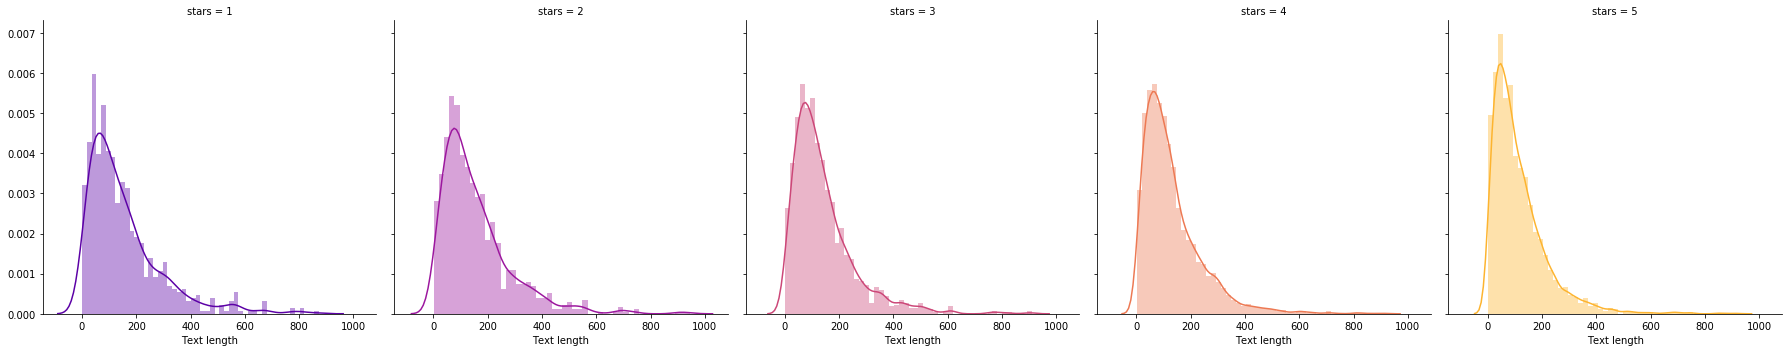

In [8]:
a = sns.FacetGrid(data = ds, col = 'stars', hue = 'stars', palette='plasma', height=5)
a.map(sns.distplot, "Text length", bins=50)

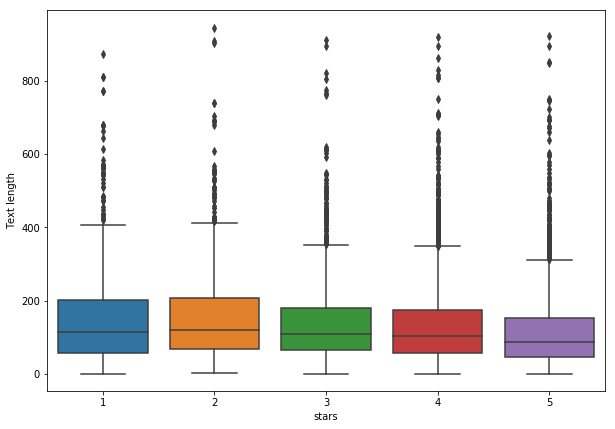

In [9]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'stars', y = 'Text length', data = ds)

## From the plot, looks like the 1-star and 2-star ratings have much longer text, but there are many outliers (which can be seen as points above the boxes). Because of this, maybe text length won’t be such a useful feature to consider after all.

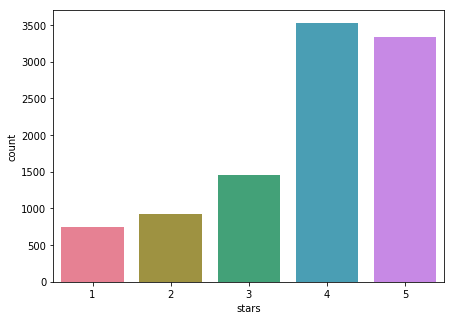

In [10]:
plt.figure(figsize = (7,5))
sns.countplot('stars', data = ds, palette="husl")

In [11]:
stars = ds.groupby('stars').mean()
stars.corr()

,cool,useful,funny,Text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
Text length,-0.865362,0.697506,0.847204,1.000000


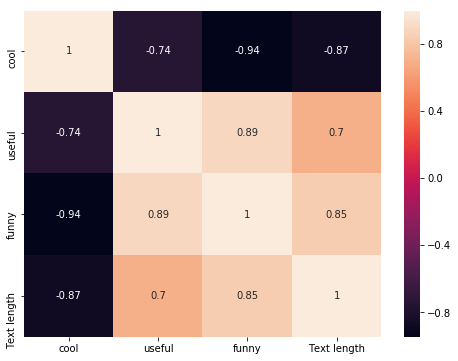

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(ds.groupby('stars').mean().corr(), annot=True)

In [13]:
ds.shape

(10000, 11)

In [14]:
yelp_class = ds[(ds['stars'] == 1) | (ds['stars'] == 5)]
yelp_class.shape

(4086, 11)

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [17]:
'''The classification algorithm will need some sort of feature vector in order to perform the 
classification task. The simplest way to convert a corpus to a vector format is the bag-of-words 
approach, where each unique word in a text will be represented by one number.

First, let’s write a function that will split a message into its individual words, and 
return a list. We will also remove the very common words (such as “the”, “a”, “an”, etc.), 
also known as stopwords. To do this, we can take advantage of the NLTK library. 
The function below removes punctuation, stopwords, and returns a list of the remaining words, or tokens.'''

import string
from nltk.corpus import stopwords
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
text_process(X[0])

['wife',
 'took',
 'birthday',
 'breakfast',
 'excellent',
 'weather',
 'perfect',
 'made',
 'sitting',
 'outside',
 'overlooking',
 'grounds',
 'absolute',
 'pleasure',
 'waitress',
 'excellent',
 'food',
 'arrived',
 'quickly',
 'semibusy',
 'Saturday',
 'morning',
 'looked',
 'like',
 'place',
 'fills',
 'pretty',
 'quickly',
 'earlier',
 'get',
 'better',
 'favor',
 'get',
 'Bloody',
 'Mary',
 'phenomenal',
 'simply',
 'best',
 'Ive',
 'ever',
 'Im',
 'pretty',
 'sure',
 'use',
 'ingredients',
 'garden',
 'blend',
 'fresh',
 'order',
 'amazing',
 'EVERYTHING',
 'menu',
 'looks',
 'excellent',
 'white',
 'truffle',
 'scrambled',
 'eggs',
 'vegetable',
 'skillet',
 'tasty',
 'delicious',
 'came',
 '2',
 'pieces',
 'griddled',
 'bread',
 'amazing',
 'absolutely',
 'made',
 'meal',
 'complete',
 'best',
 'toast',
 'Ive',
 'ever',
 'Anyway',
 'cant',
 'wait',
 'go',
 'back']

In [19]:
'''At the moment, we have our reviews as lists of tokens (also known as lemmas). 
To enable Scikit-learn algorithms to work on our text, we need to convert each review into a vector.
We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. '''
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [20]:
len(bow_transformer.vocabulary_)

26435

In [21]:
review_25 = X[24]
review_25

"I love this place! I have been coming here for ages.\r\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

In [22]:
X = bow_transformer.transform(X)

In [23]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (4086, 26435)
Amount of Non-Zero occurrences:  222391


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
'''Multinomial Naive Bayes is a specialised version of Naive Bayes designed more for text documents. 
Let’s build a Multinomial Naive Bayes model and fit it to our training set (X_train and y_train).'''
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
preds = nb.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[157  71]
 [ 24 974]]


             precision    recall  f1-score   support

          1       0.87      0.69      0.77       228
          5       0.93      0.98      0.95       998

avg / total       0.92      0.92      0.92      1226



In [28]:
fiveStar = ds[(ds['stars'] == 5)]
oneStar = ds[(ds['stars'] == 1)]

good_bow = text_process(fiveStar['text'])
bad_bow = text_process(oneStar['text'])

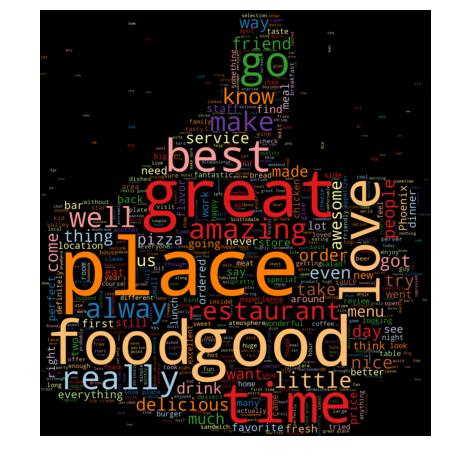

<Figure size 720x432 with 0 Axes>

In [29]:
# Start with one review:
stopwords = set(STOPWORDS)
stopwords.add('one')
stopwords.add('also')
text = " ".join(review for review in good_bow)
mask_image = np.array(Image.open("thumb.jpg"))
wc = WordCloud(colormap = "Paired",mask = mask_image, width = 300, height = 200, scale=2,max_words=1000, stopwords=stopwords)
wordcloud = wc.generate(text)

plt.figure(figsize = (7,10))
plt.imshow(wordcloud, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.figure(figsize = (10,6))
plt.show()

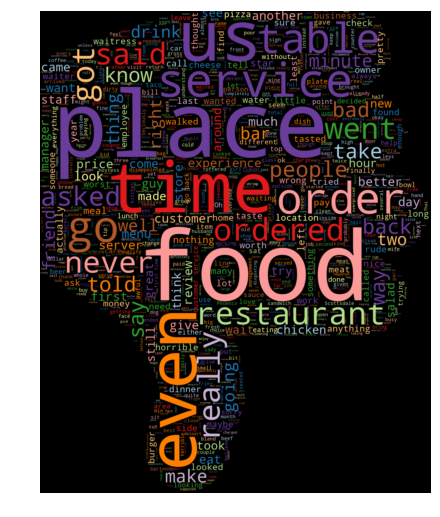

<Figure size 720x432 with 0 Axes>

In [30]:
# Start with one review:
stopwords = set(STOPWORDS)
stopwords.add('one')
stopwords.add('also')
stopwords.add('good')
text = " ".join(review for review in bad_bow)
mask_image = np.array(Image.open("thumbdown"))
wc = WordCloud(colormap = "Paired",mask = mask_image, width = 300, height = 200, scale=2,max_words=1000, stopwords=stopwords)
wordcloud = wc.generate(text)

plt.figure(figsize = (7,10))
plt.imshow(wordcloud, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.figure(figsize = (10,6))
plt.show()